### For data preprocessing which includes CLAHE enchancement, balancing the dataset using Undersampling & Oversampling techniques, check out [this notebook](https://www.kaggle.com/code/rahulogoel/chest-x-rays-eda-clahe-enchanced-balanced).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from os import listdir
import pickle
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers

%matplotlib inline

E0000 00:00:1729437345.443254      13 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:479
D1020 15:15:45.451668165      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D1020 15:15:45.451682834      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D1020 15:15:45.451686280      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D1020 15:15:45.451688820      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D1020 15:15:45.451691298      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defau

In [ ]:
print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE

# Detect TPU, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() 

print("REPLICAS: ", strategy.num_replicas_in_sync)

Tensorflow version 2.16.1
Running on TPU  
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


I0000 00:00:1729437356.149329      13 service.cc:145] XLA service 0x5bc083824db0 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729437356.149393      13 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1729437356.149399      13 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1729437356.149404      13 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1729437356.149410      13 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1729437356.149413      13 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1729437356.149417      13 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1729437356.149421      13 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1729437356.149427      13 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


REPLICAS:  8


In [ ]:
df = pd.read_csv("../input/nih-balanced-and-resized-chest-x-rays/new_labels.csv")

In [ ]:
df.head()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
data = df.sample(frac=1).reset_index(drop=True)

In [ ]:
data.head()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00013450_000.png,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,693040625331.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,872942872047.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,315699531783.png,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,429240106527.png,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [ ]:
from tqdm import tqdm

In [ ]:
X = []
for i in tqdm(range(data.shape[0])):
    path = '../input/nih-balanced-and-resized-chest-x-rays/resized_images/resized_images/' + data['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(224, 224, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

100%|██████████| 51382/51382 [09:49<00:00, 87.20it/s] 


In [ ]:
X = np.array(X)
X.shape

(51382, 224, 224, 3)

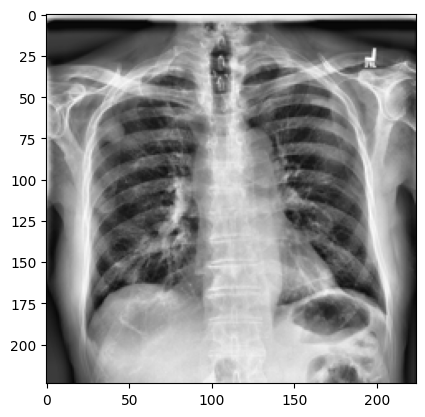

In [ ]:
plt.imshow(X[0])

In [ ]:
y = data.drop("Path", axis = 1)
y = y.to_numpy()
y.shape

(51382, 15)

In [ ]:
print(y[0])
y

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle =True)

In [ ]:
X_train.shape, y_train.shape

((30828, 224, 224, 3), (30828, 15))

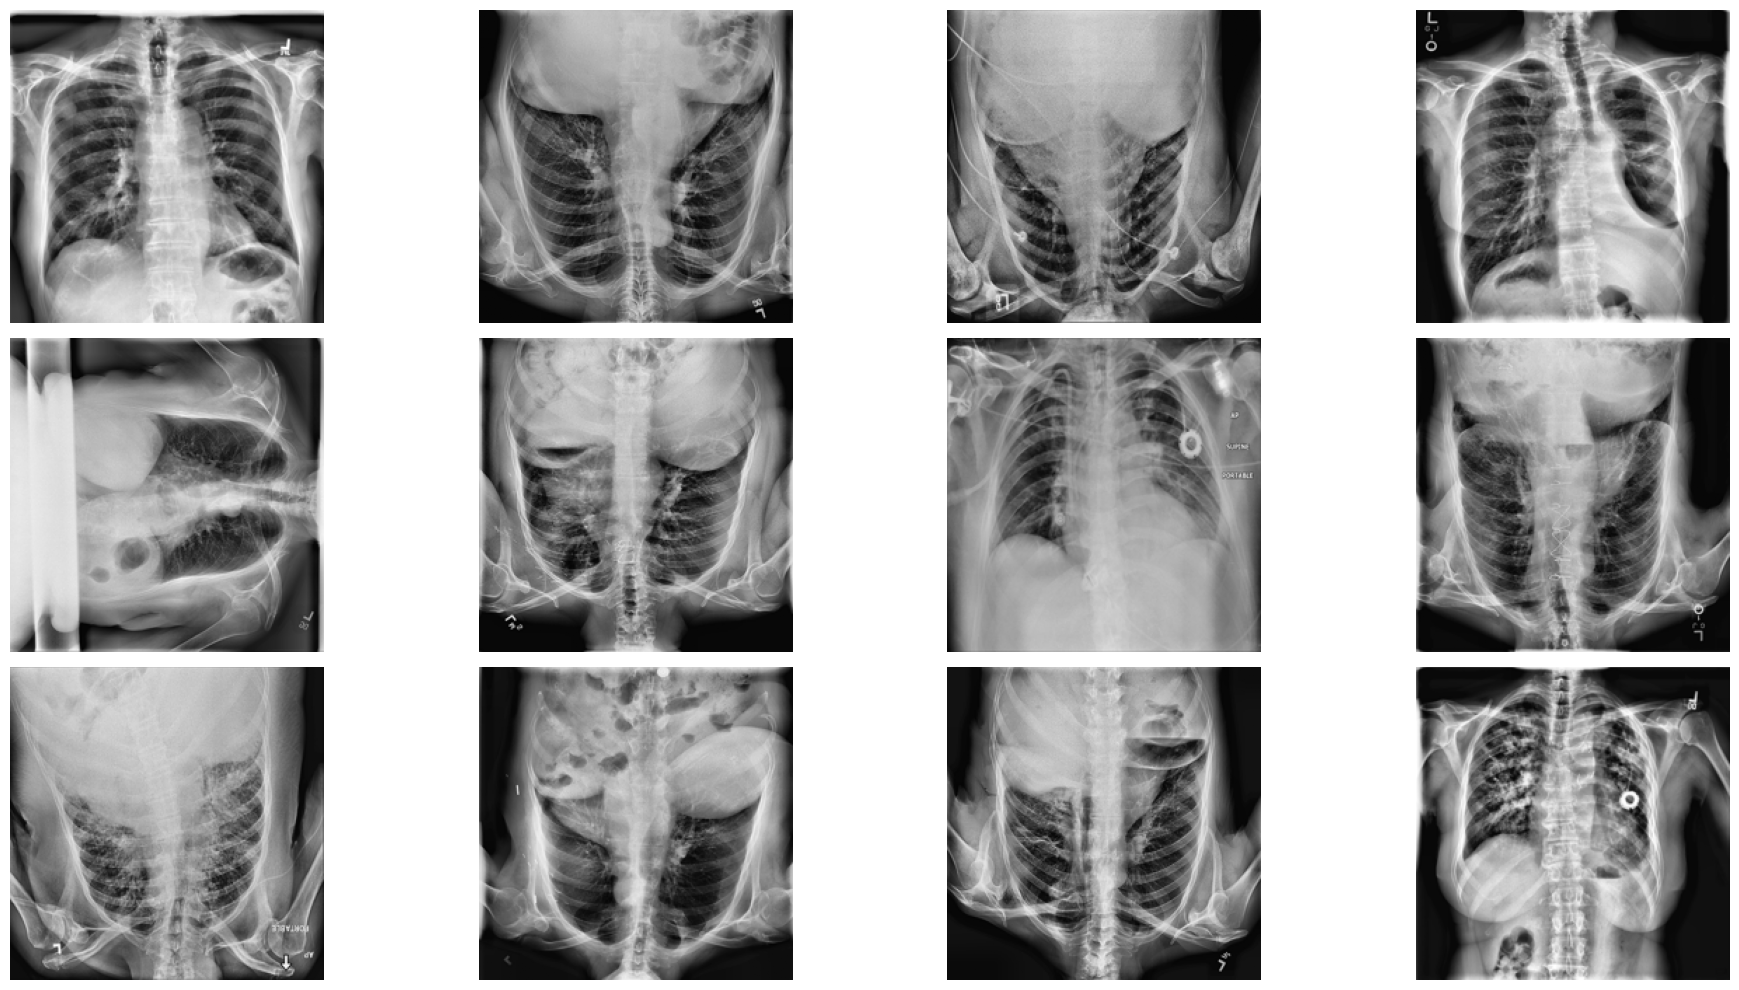

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(20,10))
axes = axes.flatten()
for img, ax in zip(X, axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

Model = 1 (epochs = 20, batch size = 128, learning rate = 1e-4)

In [ ]:
# Initialize hyperparameters.
EPOCHS = 20
INIT_LR = 1e-4
BS = 128

In [ ]:
with strategy.scope():
    
    # Initialize the model.
    model = Sequential()
              
    # 1st Convolutional Layer
    model.add(Conv2D(filters = 96, input_shape = (224,224,3), kernel_size = (11,11), strides = (4,4), padding = 'valid'))
    model.add(Activation('relu'))
    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())
    # Pooling Layer
    model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))
    
    # 2nd Convolutional Layer
    model.add(Conv2D(filters = 256, kernel_size = (5,5), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    # Pooling Layer
    model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))
    
    # 3rd Convolutional Layer
    model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    # Dropout
    model.add(Dropout(0.5))
    
    # 4th Convolutional Layer
    model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    # Dropout
    model.add(Dropout(0.5))
    
    # 5th Convolutional Layer
    model.add(Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    # Pooling Layer
    model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))
    # Dropout
    model.add(Dropout(0.5))
    
    # Passing it to a dense layer
    model.add(Flatten())
    
    # 1st Dense Layer
    model.add(Dense(4096, input_shape = (224*224*3,)))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.25))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 2nd Dense Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.5))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 3rd Dense Layer
    model.add(Dense(1000))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.5))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # Output Layer
    model.add(Dense(15))
    model.add(Activation('sigmoid'))
    
    # Get the model summary.
    model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 54, 54, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 54, 54, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 26, 26, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 12, 12, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 12, 12, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 50,901,295 (194.17 MB)

 Trainable params: 50,880,159 (194.09 MB)

 Non-trainable params: 21,136 (82.56 KB)

In [ ]:
with strategy.scope():
    opt = tf.keras.optimizers.Adam(learning_rate = INIT_LR)
    model.compile(loss="binary_crossentropy", 
                  optimizer = opt,
                  metrics = ["binary_accuracy", 
                             "f1_score",
                             tf.keras.metrics.Recall(),
                             tf.keras.metrics.Precision()])

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train, 
    batch_size = BS,
    validation_data = (X_val, y_val),
    steps_per_epoch = len(X_train) // BS,
    epochs = EPOCHS,
    verbose=1 )

Epoch 1/20


2024-10-20 13:38:06.462039: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1729431486.988208     764 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(a43812f699ecda9c:0:0), session_name()


  2/240 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - binary_accuracy: 0.5033 - f1_score: 0.0692 - loss: 0.9019 - precision: 0.0935 - recall: 0.4961   

I0000 00:00:1729431501.874159     764 tpu_compile_op_common.cc:245] Compilation of a43812f699ecda9c:0:0 with session name  took 14.885870581s and succeeded
I0000 00:00:1729431501.925809     764 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(a43812f699ecda9c:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_1462894037287742170", property.function_library_fingerprint = 2964279630769061357, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "16,224,224,3,;16,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1729431501.925863     764 tpu_compilation_cache_interface.cc:541] After adding entry for ke

239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - binary_accuracy: 0.5204 - f1_score: 0.0854 - loss: 0.8604 - precision: 0.1030 - recall: 0.5017

I0000 00:00:1729431513.762640     763 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(4ed160a844ba5f26:0:0), session_name()


240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - binary_accuracy: 0.5205 - f1_score: 0.0855 - loss: 0.8603 - precision: 0.1031 - recall: 0.5016

I0000 00:00:1729431528.589039     763 tpu_compile_op_common.cc:245] Compilation of 4ed160a844ba5f26:0:0 with session name  took 14.826357803s and succeeded
I0000 00:00:1729431528.630988     763 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(4ed160a844ba5f26:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_1462894037287742170", property.function_library_fingerprint = 2964279630769061357, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "14,224,224,3,;14,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1729431528.631029     763 tpu_compilation_cache_interface.cc:541] After adding entry for ke

240/240 ━━━━━━━━━━━━━━━━━━━━ 68s 209ms/step - binary_accuracy: 0.5205 - f1_score: 0.0855 - loss: 0.8601 - precision: 0.1031 - recall: 0.5016 - val_binary_accuracy: 0.6542 - val_f1_score: 0.0221 - val_loss: 0.6753 - val_precision: 0.0952 - val_recall: 0.2996
Epoch 2/20


I0000 00:00:1729431551.806386     787 tpu_compile_op_common.cc:245] Compilation of 4321f6e60ccdf78:0:0 with session name  took 2.021929489s and succeeded
I0000 00:00:1729431551.811459     787 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(4321f6e60ccdf78:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_10903274175902157895", property.function_library_fingerprint = 12984604497649619349, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "5,224,224,3,;5,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1729431551.811488     787 tpu_compilation_cache_interface.cc:541] After adding entry for key 4

240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - binary_accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_binary_accuracy: 0.6542 - val_f1_score: 0.0221 - val_loss: 0.6753 - val_precision: 0.0952 - val_recall: 0.2996
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - binary_accuracy: 0.6076 - f1_score: 0.0961 - loss: 0.7065 - precision: 0.1109 - recall: 0.4228 - val_binary_accuracy: 0.7192 - val_f1_score: 0.0579 - val_loss: 0.5499 - val_precision: 0.1125 - val_recall: 0.2730
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - binary_accuracy: 0.6811 - f1_score: 3.0853e-04 - loss: 0.5861 - precision: 0.0849 - recall: 0.2779 - val_binary_accuracy: 0.7143 - val_f1_score: 0.0571 - val_loss: 0.5520 - val_precision: 0.1131 - val_recall: 0.2821
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - binary_accuracy: 0.7480 - f1_score: 0.1024 - loss: 0.5302 - precision: 0.1242 - recall: 0.2553 - val_binary_accuracy: 0.8829 - va

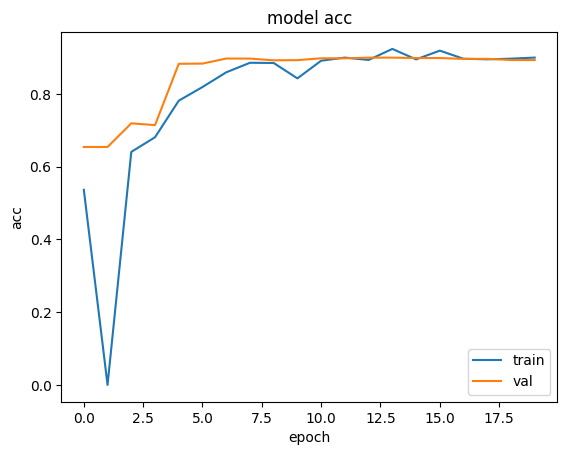

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

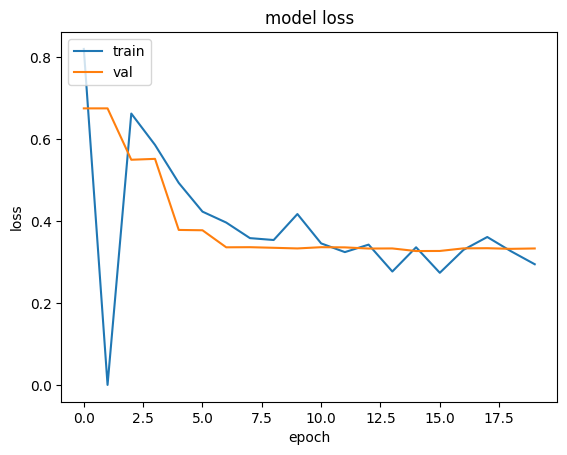

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

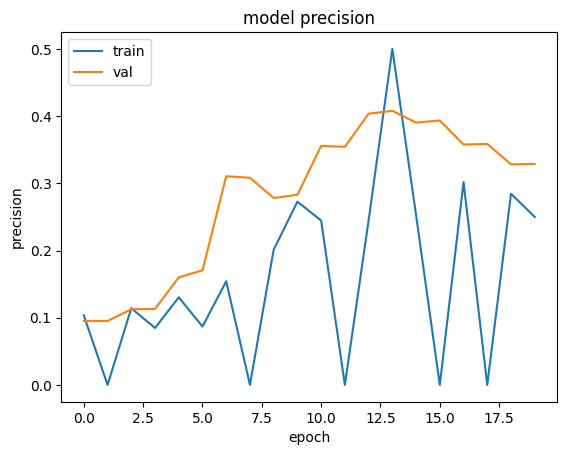

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

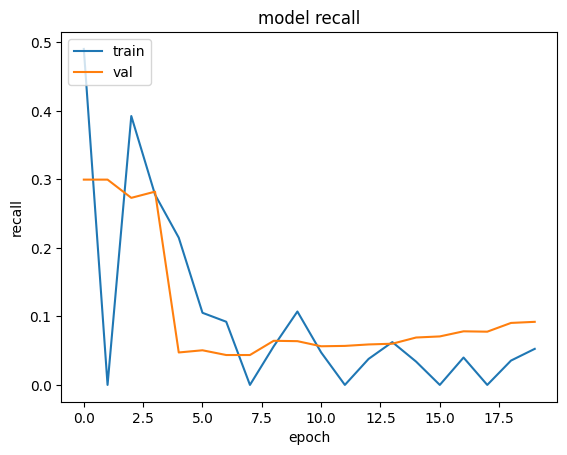

In [ ]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, return_dict = True)

322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - binary_accuracy: 0.8891 - f1_score: 0.1079 - loss: nan - precision: 0.3190 - recall: 0.0894   


In [ ]:
scores

{'binary_accuracy': 0.8865368366241455,
 'f1_score': <tf.Tensor: shape=(15,), dtype=float32, numpy=
 array([0.        , 0.        , 0.        , 0.3712871 , 0.01526717,
        0.06493501, 0.13270138, 0.13953486, 0.07142853, 0.10891084,
        0.03252031, 0.18924727, 0.        , 0.21881834, 0.11707313],
       dtype=float32)>,
 'loss': 0.3581620752811432,
 'precision': 0.2968460023403168,
 'recall': 0.08130080997943878}

Model = 2 (epochs = 100, batch size = 128, learning rate = default(0.001))

In [ ]:
with strategy.scope():
    
    # Initialize the model.
    model = Sequential()
              
    # 1st Convolutional Layer
    model.add(Conv2D(filters = 96, input_shape = (224,224,3), kernel_size = (11,11), strides = (4,4), padding = 'valid'))
    model.add(Activation('relu'))
    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())
    # Pooling Layer
    model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))
    
    # 2nd Convolutional Layer
    model.add(Conv2D(filters = 256, kernel_size = (5,5), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    # Pooling Layer
    model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))
    
    # 3rd Convolutional Layer
    model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    # Dropout
    model.add(Dropout(0.5))
    
    # 4th Convolutional Layer
    model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    # Dropout
    model.add(Dropout(0.5))
    
    # 5th Convolutional Layer
    model.add(Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    # Pooling Layer
    model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))
    # Dropout
    model.add(Dropout(0.5))
    
    # Passing it to a dense layer
    model.add(Flatten())
    
    # 1st Dense Layer
    model.add(Dense(4096, input_shape = (224*224*3,)))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.25))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 2nd Dense Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.5))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 3rd Dense Layer
    model.add(Dense(1000))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.5))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # Output Layer
    model.add(Dense(15))
    model.add(Activation('sigmoid'))
    
    # Get the model summary.
    model.summary()

/usr/local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729438023.107323      13 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
/usr/local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 54, 54, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 54, 54, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 26, 26, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 50,901,295 (194.17 MB)

 Trainable params: 50,880,159 (194.09 MB)

 Non-trainable params: 21,136 (82.56 KB)

In [ ]:
with strategy.scope():
    opt = tf.keras.optimizers.Adam()
    model.compile(loss="binary_crossentropy", 
                  optimizer = opt,
                  metrics = ["binary_accuracy", 
                             "f1_score",
                             tf.keras.metrics.Recall(),
                             tf.keras.metrics.Precision()])

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train, 
    batch_size = 128,
    validation_data = (X_val, y_val),
    steps_per_epoch = len(X_train) // BS,
    epochs = 100,
    verbose=1)

Epoch 1/100


2024-10-20 15:27:48.478057: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1729438069.059969     816 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(d19f1f5a04b7b7b7:0:0), session_name()


  1/240 ━━━━━━━━━━━━━━━━━━━━ 1:18:03 20s/step - binary_accuracy: 0.5057 - f1_score: 0.0492 - loss: 0.8881 - precision: 0.0949 - recall: 0.5000

I0000 00:00:1729438085.307581     816 tpu_compile_op_common.cc:245] Compilation of d19f1f5a04b7b7b7:0:0 with session name  took 16.247569403s and succeeded
I0000 00:00:1729438085.359369     816 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(d19f1f5a04b7b7b7:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_3767541172908416841", property.function_library_fingerprint = 1331408894822774800, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "16,224,224,3,;16,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1729438085.359438     816 tpu_compilation_cache_interface.cc:541] After adding entry for ke

239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - binary_accuracy: 0.7015 - f1_score: 0.0994 - loss: 0.6058 - precision: 0.1113 - recall: 0.2810

I0000 00:00:1729438097.960532     816 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(f8c104bc499c28b6:0:0), session_name()


240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - binary_accuracy: 0.7019 - f1_score: 0.0995 - loss: 0.6051 - precision: 0.1113 - recall: 0.2804

I0000 00:00:1729438113.049836     816 tpu_compile_op_common.cc:245] Compilation of f8c104bc499c28b6:0:0 with session name  took 15.089259282s and succeeded
I0000 00:00:1729438113.092632     816 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(f8c104bc499c28b6:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_3767541172908416841", property.function_library_fingerprint = 1331408894822774800, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "14,224,224,3,;14,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1729438113.092674     816 tpu_compilation_cache_interface.cc:541] After adding entry for ke

240/240 ━━━━━━━━━━━━━━━━━━━━ 71s 215ms/step - binary_accuracy: 0.7024 - f1_score: 0.0996 - loss: 0.6045 - precision: 0.1114 - recall: 0.2798 - val_binary_accuracy: 0.8967 - val_f1_score: 0.0657 - val_loss: 0.3904 - val_precision: 0.3805 - val_recall: 0.0401
Epoch 2/100


I0000 00:00:1729438136.644172     820 tpu_compile_op_common.cc:245] Compilation of 8ca19db110f7f4c0:0:0 with session name  took 2.137892007s and succeeded
I0000 00:00:1729438136.648735     820 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(8ca19db110f7f4c0:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_8512152553662805356", property.function_library_fingerprint = 8749343377515412343, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "5,224,224,3,;5,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1729438136.648760     820 tpu_compilation_cache_interface.cc:541] After adding entry for key 8

240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - binary_accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_binary_accuracy: 0.8967 - val_f1_score: 0.0657 - val_loss: 0.3904 - val_precision: 0.3805 - val_recall: 0.0401
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - binary_accuracy: 0.8961 - f1_score: 0.1344 - loss: 0.3320 - precision: 0.2715 - recall: 0.0302 - val_binary_accuracy: 0.8953 - val_f1_score: 0.0844 - val_loss: 0.3241 - val_precision: 0.3846 - val_recall: 0.0643
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - binary_accuracy: 0.9048 - f1_score: 0.0334 - loss: 0.2959 - precision: 5.2083e-04 - recall: 3.2552e-05 - val_binary_accuracy: 0.8937 - val_f1_score: 0.0860 - val_loss: 0.3255 - val_precision: 0.3585 - val_recall: 0.0685
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - binary_accuracy: 0.8997 - f1_score: 0.1431 - loss: 0.3173 - precision: 0.3776 - recall: 0.0276 - val_binary_accuracy: 0.89

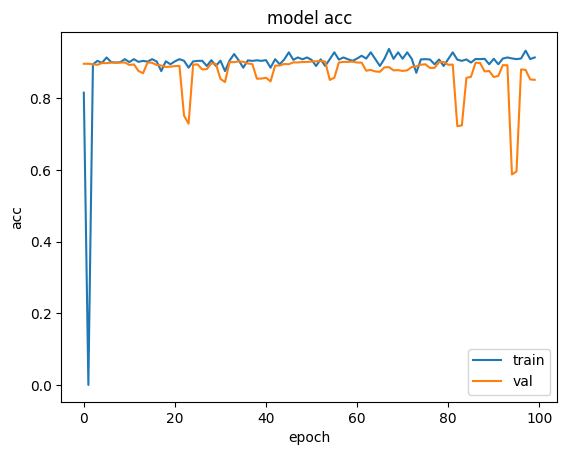

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

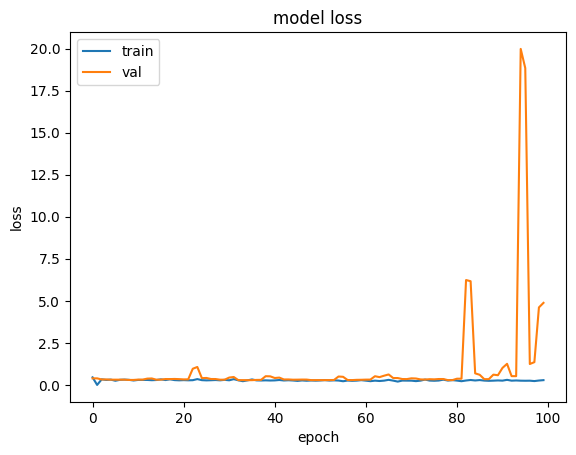

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

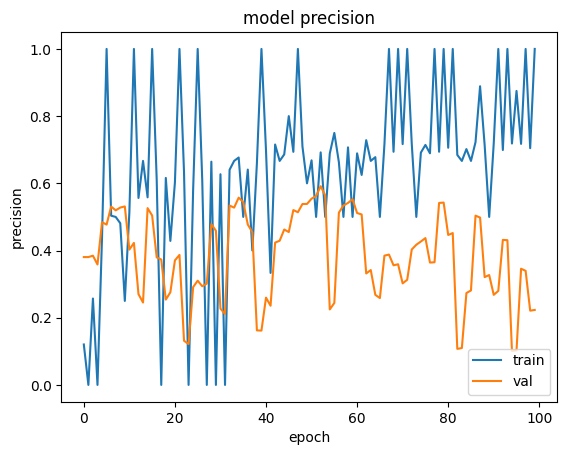

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

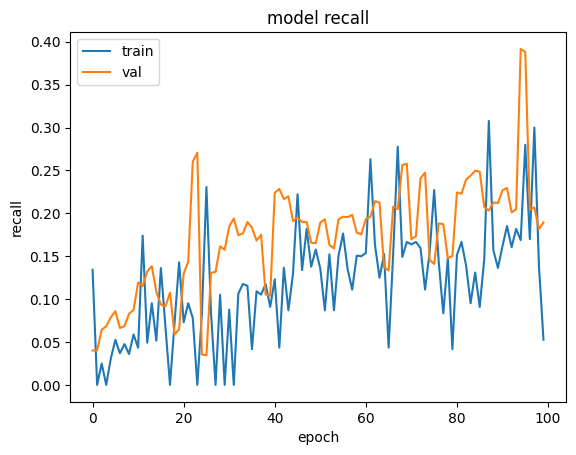

In [ ]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, return_dict = True)

I0000 00:00:1729439391.821093     784 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(488ed162c174d7f0:0:0), session_name()


 13/322 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - binary_accuracy: 0.8576 - f1_score: 0.1564 - loss: 2.2297 - precision: 0.2447 - recall: 0.1665

I0000 00:00:1729439395.197046     784 tpu_compile_op_common.cc:245] Compilation of 488ed162c174d7f0:0:0 with session name  took 3.375906898s and succeeded
I0000 00:00:1729439395.201345     784 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(488ed162c174d7f0:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_8512152553662805356", property.function_library_fingerprint = 8749343377515412343, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "4,224,224,3,;4,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1729439395.201371     784 tpu_compilation_cache_interface.cc:541] After adding entry for key 4

320/322 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - binary_accuracy: 0.8613 - f1_score: 0.1927 - loss: 2.5217 - precision: 0.2351 - recall: 0.1699

I0000 00:00:1729439399.897451     792 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(44582d09f9bf85:0:0), session_name()


322/322 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - binary_accuracy: 0.8613 - f1_score: 0.1927 - loss: nan - precision: 0.2350 - recall: 0.1700 


I0000 00:00:1729439404.960748     792 tpu_compile_op_common.cc:245] Compilation of 44582d09f9bf85:0:0 with session name  took 5.063261897s and succeeded
I0000 00:00:1729439404.965195     792 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(44582d09f9bf85:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_8512152553662805356", property.function_library_fingerprint = 8749343377515412343, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "2,224,224,3,;2,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1729439404.965222     792 tpu_compilation_cache_interface.cc:541] After adding entry for key 44582

In [ ]:
scores

{'binary_accuracy': 0.8527108430862427,
 'f1_score': <tf.Tensor: shape=(15,), dtype=float32, numpy=
 array([0.        , 0.20289852, 0.01666665, 0.42222217, 0.24316104,
        0.20886071, 0.15331006, 0.3854545 , 0.0125786 , 0.09561747,
        0.3197674 , 0.        , 0.1741935 , 0.19718306, 0.29610384],
       dtype=float32)>,
 'loss': 5.401861190795898,
 'precision': 0.21017564833164215,
 'recall': 0.18437832593917847}

Model = 3 (epochs = 300, batch size = 128, learning rate = 1e-4)

In [ ]:
with strategy.scope():
    
    # Initialize the model.
    model = Sequential()
              
    # 1st Convolutional Layer
    model.add(Conv2D(filters = 96, input_shape = (224,224,3), kernel_size = (11,11), strides = (4,4), padding = 'valid'))
    model.add(Activation('relu'))
    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())
    # Pooling Layer
    model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))
    
    # 2nd Convolutional Layer
    model.add(Conv2D(filters = 256, kernel_size = (5,5), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    # Pooling Layer
    model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))
    
    # 3rd Convolutional Layer
    model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    # Dropout
    model.add(Dropout(0.5))
    
    # 4th Convolutional Layer
    model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    # Dropout
    model.add(Dropout(0.5))
    
    # 5th Convolutional Layer
    model.add(Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    # Pooling Layer
    model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))
    # Dropout
    model.add(Dropout(0.5))
    
    # Passing it to a dense layer
    model.add(Flatten())
    
    # 1st Dense Layer
    model.add(Dense(4096, input_shape = (224*224*3,)))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.25))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 2nd Dense Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.5))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 3rd Dense Layer
    model.add(Dense(1000))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.5))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # Output Layer
    model.add(Dense(15))
    model.add(Activation('sigmoid'))
    
    # Get the model summary.
    model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 54, 54, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 54, 54, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 26, 26, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 12, 12, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 12, 12, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 50,901,295 (194.17 MB)

 Trainable params: 50,880,159 (194.09 MB)

 Non-trainable params: 21,136 (82.56 KB)

In [ ]:
with strategy.scope():
    opt = tf.keras.optimizers.Adam(learning_rate = INIT_LR)
    model.compile(loss="binary_crossentropy", 
                  optimizer = opt,
                  metrics = ["binary_accuracy", 
                             "f1_score",
                             tf.keras.metrics.Recall(),
                             tf.keras.metrics.Precision()])

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train, 
    batch_size = BS,
    validation_data = (X_val, y_val),
    steps_per_epoch = len(X_train) // BS,
    epochs = 300,
    verbose=1 )

Epoch 1/300


2024-10-20 13:53:56.502812: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1729432437.013847     829 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(96d3dcd9d4fe91d6:0:0), session_name()


  1/240 ━━━━━━━━━━━━━━━━━━━━ 1:10:41 18s/step - binary_accuracy: 0.4974 - f1_score: 0.0532 - loss: 0.8985 - precision_1: 0.0999 - recall_1: 0.5132

I0000 00:00:1729432451.442207     829 tpu_compile_op_common.cc:245] Compilation of 96d3dcd9d4fe91d6:0:0 with session name  took 14.428305953s and succeeded
I0000 00:00:1729432451.498679     829 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(96d3dcd9d4fe91d6:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_2852527635714226115", property.function_library_fingerprint = 3783752617084993502, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "16,224,224,3,;16,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1729432451.498740     829 tpu_compilation_cache_interface.cc:541] After adding entry for ke

239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - binary_accuracy: 0.5198 - f1_score: 0.0857 - loss: 0.8576 - precision_1: 0.1031 - recall_1: 0.5025

I0000 00:00:1729432463.411556     791 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(164c5b9ba83d8cd8:0:0), session_name()


240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - binary_accuracy: 0.5199 - f1_score: 0.0857 - loss: 0.8574 - precision_1: 0.1031 - recall_1: 0.5024

I0000 00:00:1729432478.979577     791 tpu_compile_op_common.cc:245] Compilation of 164c5b9ba83d8cd8:0:0 with session name  took 15.567946849s and succeeded
I0000 00:00:1729432479.028323     791 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(164c5b9ba83d8cd8:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_2852527635714226115", property.function_library_fingerprint = 3783752617084993502, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "14,224,224,3,;14,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1729432479.028371     791 tpu_compilation_cache_interface.cc:541] After adding entry for ke

240/240 ━━━━━━━━━━━━━━━━━━━━ 69s 214ms/step - binary_accuracy: 0.5200 - f1_score: 0.0858 - loss: 0.8572 - precision_1: 0.1031 - recall_1: 0.5024 - val_binary_accuracy: 0.6258 - val_f1_score: 0.0192 - val_loss: 0.6523 - val_precision_1: 0.1060 - val_recall_1: 0.3816
Epoch 2/300


I0000 00:00:1729432502.700008     780 tpu_compile_op_common.cc:245] Compilation of 40b3fa5db9295ba0:0:0 with session name  took 1.974579864s and succeeded
I0000 00:00:1729432502.706075     780 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(40b3fa5db9295ba0:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_14185903621018404008", property.function_library_fingerprint = 18321788346261073491, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "5,224,224,3,;5,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1729432502.706105     780 tpu_compilation_cache_interface.cc:541] After adding entry for key

240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - binary_accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - loss: 0.0000e+00 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_binary_accuracy: 0.6258 - val_f1_score: 0.0192 - val_loss: 0.6523 - val_precision_1: 0.1060 - val_recall_1: 0.3816
Epoch 3/300
240/240 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - binary_accuracy: 0.6043 - f1_score: 0.0989 - loss: 0.7079 - precision_1: 0.1110 - recall_1: 0.4293 - val_binary_accuracy: 0.7688 - val_f1_score: 0.0375 - val_loss: 0.4933 - val_precision_1: 0.1034 - val_recall_1: 0.1788
Epoch 4/300
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - binary_accuracy: 0.7143 - f1_score: 0.0666 - loss: 0.5577 - precision_1: 0.1453 - recall_1: 0.3805 - val_binary_accuracy: 0.7691 - val_f1_score: 0.0377 - val_loss: 0.4917 - val_precision_1: 0.1046 - val_recall_1: 0.1809
Epoch 5/300
240/240 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - binary_accuracy: 0.7480 - f1_score: 0.1035 - loss: 0.5296 - precision_1: 0.1239 - recall_1: 0.2536 - val_b

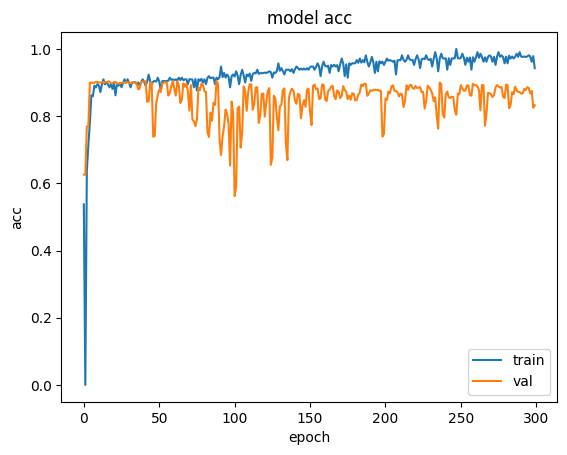

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

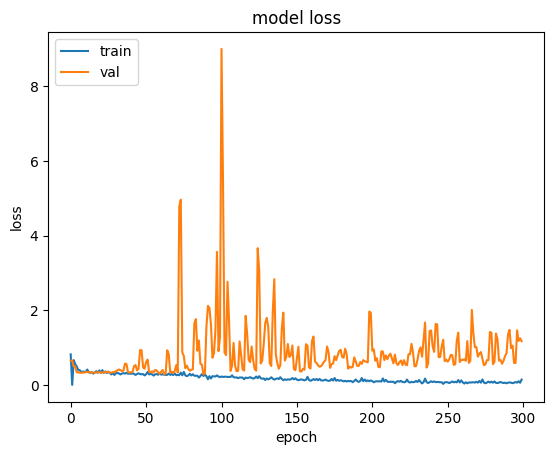

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

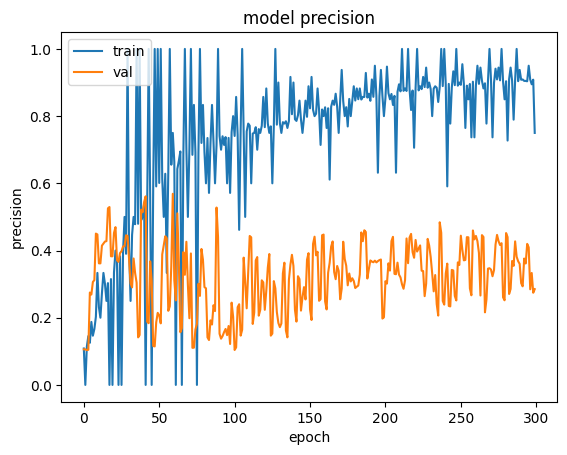

In [ ]:
plt.plot(history.history['precision_1'])
plt.plot(history.history['val_precision_1'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

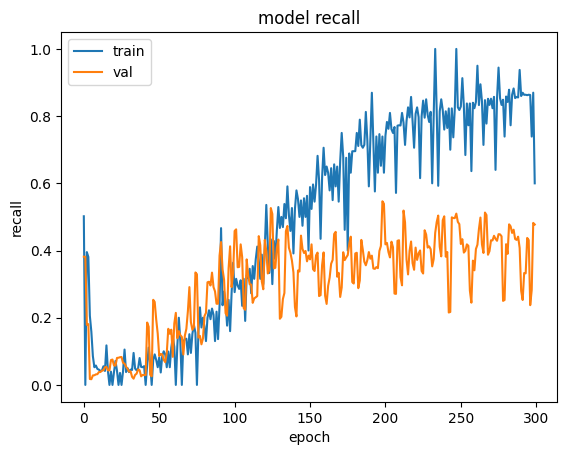

In [ ]:
plt.plot(history.history['recall_1'])
plt.plot(history.history['val_recall_1'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, return_dict = True)

I0000 00:00:1729436347.886294     762 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(278b5cf87e901b95:0:0), session_name()


  9/322 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - binary_accuracy: 0.8199 - f1_score: 0.2404 - loss: 1.2677 - precision_1: 0.3038 - recall_1: 0.5081

I0000 00:00:1729436351.282364     762 tpu_compile_op_common.cc:245] Compilation of 278b5cf87e901b95:0:0 with session name  took 3.395962524s and succeeded
I0000 00:00:1729436351.288052     762 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(278b5cf87e901b95:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_14185903621018404008", property.function_library_fingerprint = 18321788346261073491, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "4,224,224,3,;4,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1729436351.288089     762 tpu_compilation_cache_interface.cc:541] After adding entry for key

321/322 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - binary_accuracy: 0.8298 - f1_score: 0.3066 - loss: 1.1678 - precision_1: 0.2930 - recall_1: 0.4870

I0000 00:00:1729436357.047769     814 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(dda3d54fdf6c5f73:0:0), session_name()


322/322 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - binary_accuracy: 0.8298 - f1_score: 0.3067 - loss: nan - precision_1: 0.2931 - recall_1: 0.4870 


I0000 00:00:1729436365.183781     814 tpu_compile_op_common.cc:245] Compilation of dda3d54fdf6c5f73:0:0 with session name  took 8.135970498s and succeeded
I0000 00:00:1729436365.189167     814 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(dda3d54fdf6c5f73:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_14185903621018404008", property.function_library_fingerprint = 18321788346261073491, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "2,224,224,3,;2,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1729436365.189205     814 tpu_compilation_cache_interface.cc:541] After adding entry for key

In [ ]:
scores

{'binary_accuracy': 0.8291054368019104,
 'f1_score': <tf.Tensor: shape=(15,), dtype=float32, numpy=
 array([0.21698108, 0.52261305, 0.18309855, 0.5762712 , 0.30263156,
        0.22580643, 0.37391302, 0.8404908 , 0.17441857, 0.18497106,
        0.06611568, 0.13559319, 0.35233155, 0.51636356, 0.26666662],
       dtype=float32)>,
 'loss': 1.1955496072769165,
 'precision_1': 0.29848024249076843,
 'recall_1': 0.4989837408065796}

### Some findings after training models with different hyperparameters:

- `Batch size` is the number of training examples used in one iteration of model training. Here it is kept same at **128**.

- `Epoch` represents one complete pass through the entire training dataset. It should not be too high/small otherwise it will lead to overfitting/underfitting of data which will lead to an increase in loss of our model. Above, if we compare **Model = 1** and **Model = 3**, we can see that an increase in epochs will result in a **decrease in Accuracy** and an **increase in Loss**. 

- `Learning rate` influences how quickly the model converges. In **Model = 2** we can see that the loss is very high as compared to **Model = 1** and **Model = 3** as the learning rate is set to **default(0.001)**. So, it should be kept here at **1e-4**.


#### Lastly, the optimal model comes out to be Model = 1 where `epochs = 20`, `batch_size = 128` & `learning_rate = 1e-4`.